In [1]:
from summer2 import CompartmentalModel
from summer2.parameters import Parameter

In [2]:
model = CompartmentalModel(
    [0.0, 20.0],
    ["hh_savings", "gov_holdings", "corp_holdings"],
    [],
)

In [3]:
model.add_transition_flow(
    "wage_savings",
    Parameter("wage_rate") * (1.0 - Parameter("tax_prop")) * (1.0 - Parameter("consum_propens")),
    "corp_holdings",
    "hh_savings",
)
model.add_transition_flow(
    "welfare",
    Parameter("welfare_rate") * (1.0 - Parameter("consum_propens")),
    "gov_holdings",
    "hh_savings",
)
model.add_transition_flow(
    "taxation",
    Parameter("wage_rate") * Parameter("tax_prop"),
    "corp_holdings",
    "gov_holdings",
)
model.add_transition_flow(
    "consumption",
    Parameter("wage_rate") * (1.0 - Parameter("tax_prop")) * Parameter("consum_propens"),
    "hh_savings",
    "corp_holdings",
)
init_conds = {
    "hh_savings": 10.0,
    "gov_holdings": 10.0,
    "corp_holdings": 10.0,
}   
model.set_initial_population(init_conds)

In [6]:
params = {
    "wage_rate": 0.4,
    "tax_prop": 0.2,
    "consum_propens": 0.5,
    "welfare_rate": 0.3,
}
model.run(params)

<Axes: >

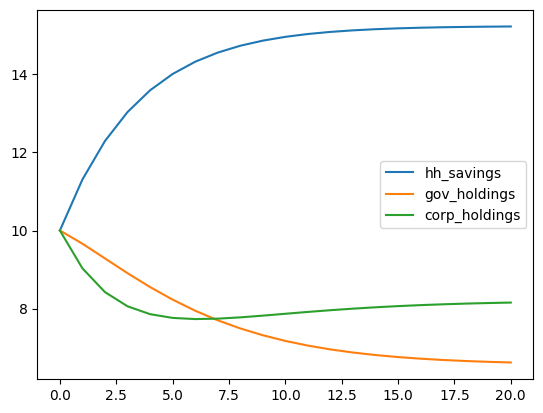

In [7]:
model.get_outputs_df().plot()